### Instalar paquetes de machine learning

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl

### Impportacion del dataset

In [113]:
import pandas as pd


# Cargar el conjunto de datos desde UCI Machine Learning Repository
data = pd.read_excel('Online Retail.xlsx')

### Inspeccion del dataset

In [114]:
# Ahora puedes trabajar con 'data' como con cualquier DataFrame de Pandas
data.sample(10)# Mostrar las primeras filas del DataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
318221,564825,22678,FRENCH BLUE METAL DOOR SIGN 3,1,2011-08-30 12:26:00,2.46,NaN,United Kingdom
212549,555492,22431,WATERING CAN BLUE ELEPHANT,12,2011-06-03 14:24:00,1.95,16967.0,United Kingdom
166099,550890,84882,GREEN WIRE STANDING CANDLE HOLDER,2,2011-04-21 12:00:00,3.75,14711.0,United Kingdom
104914,545215,84988,SET OF 72 PINK HEART PAPER DOILIES,1,2011-02-28 16:47:00,2.92,NaN,United Kingdom
462607,575983,21429,RED GINGHAM ROSE JEWELLERY BOX,1,2011-11-13 13:45:00,1.95,13379.0,United Kingdom
442748,574680,23284,DOORMAT KEEP CALM AND COME IN,2,2011-11-06 12:40:00,8.25,15078.0,United Kingdom
196987,553879,22907,PACK OF 20 NAPKINS PANTRY DESIGN,24,2011-05-19 15:15:00,0.85,15791.0,United Kingdom
332594,566083,21504,SKULLS GREETING CARD,72,2011-09-09 10:10:00,0.36,13145.0,United Kingdom
257157,559514,22845,VINTAGE CREAM CAT FOOD CONTAINER,1,2011-07-08 15:57:00,12.46,NaN,United Kingdom
403359,571562,20728,LUNCH BAG CARS BLUE,20,2011-10-18 10:04:00,1.65,14156.0,EIRE


In [115]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [117]:
data.shape

(541909, 8)

In [118]:
data.nunique()  # Muestra el número de valores únicos en cada columna

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [119]:
data.isnull().sum()  # Cuenta el número de valores faltantes en cada columna


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [120]:
# Calcular el total de filas en el dataset
total_rows = data.shape[0]

# Calcular el número de valores faltantes por columna
missing_values_count = data.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values_count / total_rows) * 100

# Mostrar el porcentaje de valores faltantes por columna
missing_percentage


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [121]:
data.duplicated().sum()  # Cuenta las filas duplicadas

np.int64(5268)

#### Limpieza de datos
##### Eliminación de duplicados

In [122]:
data = data.drop_duplicates()

##### Tratamiento de valores faltantes

In [123]:
data['Description'] = data['Description'].fillna('Description Not Available')

Eliminar entradas con precios unitarios negativos o cero

In [124]:
data = data[data['UnitPrice'] > 0]
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
435931,574077,20752,BLUE POLKADOT WASHING UP GLOVES,1,2011-11-02 15:56:00,2.10,17999.0,United Kingdom
95846,544467,35241,ENAMEL BLUE RIM BISCUIT BIN,2,2011-02-20 15:51:00,4.95,14502.0,United Kingdom
32059,539039,20726,LUNCH BAG WOODLAND,10,2010-12-15 15:00:00,1.65,13124.0,United Kingdom
211669,555396,20972,PINK CREAM FELT CRAFT TRINKET BOX,13,2011-06-02 17:23:00,1.25,16529.0,United Kingdom
46619,540355,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,34,2011-01-06 15:11:00,4.21,NaN,United Kingdom
507677,579187,22756,LARGE YELLOW BABUSHKA NOTEBOOK,2,2011-11-28 15:31:00,2.46,NaN,United Kingdom
232094,557304,23284,DOORMAT KEEP CALM AND COME IN,2,2011-06-19 14:40:00,7.95,16326.0,United Kingdom
3382,536623,21070,VINTAGE BILLBOARD MUG,12,2010-12-02 10:39:00,1.25,15601.0,United Kingdom
317175,564758,22341,LOVE GARLAND PAINTED ZINC,1,2011-08-30 10:39:00,1.65,NaN,United Kingdom
331846,566040,22847,BREAD BIN DINER STYLE IVORY,1,2011-09-08 13:38:00,16.95,12540.0,Spain


Considerar qué hacer con cantidades negativas; si representan devoluciones, podrían ser válidas para el análisis

In [125]:
data = data[(data['Quantity'] > 0)]
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
510076,579414,84375,SET OF 20 KIDS COOKIE CUTTERS,2,2011-11-29 12:52:00,2.10,14719.0,United Kingdom
134414,547840,22149,FELTCRAFT 6 FLOWER FRIENDS,40,2011-03-27 10:56:00,1.85,15133.0,United Kingdom
95145,544445,22968,ROSE COTTAGE KEEPSAKE BOX,3,2011-02-20 10:56:00,9.95,16746.0,United Kingdom
310317,564173,22551,PLASTERS IN TIN SPACEBOY,12,2011-08-23 14:23:00,1.65,12567.0,France
421728,573022,23100,SILVER BELLS TABLE DECORATION,12,2011-10-27 12:42:00,1.25,16011.0,United Kingdom
247125,558754,22607,WOODEN ROUNDERS GARDEN SET,2,2011-07-03 12:10:00,9.95,15518.0,United Kingdom
94013,544323,22558,CLOTHES PEGS RETROSPOT PACK 24,3,2011-02-17 15:51:00,2.46,NaN,United Kingdom
78925,542905,23231,WRAP DOILEY DESIGN,25,2011-02-01 15:11:00,0.42,12540.0,Spain
225184,556636,23300,GARDENERS KNEELING PAD CUP OF TEA,1,2011-06-13 15:30:00,3.29,NaN,United Kingdom
383964,570095,15060B,FAIRY CAKE DESIGN UMBRELLA,4,2011-10-07 11:57:00,3.75,12528.0,Germany


In [126]:
# Convertir 'InvoiceDate' a datetime si aún no lo es
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.0+ MB


In [127]:
# Asegurar que 'CustomerID' esté en formato adecuado
data['CustomerID'] = data['CustomerID'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  category      
 7   Country      524878 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.2+ MB


In [128]:
# Creación de nuevas columnas para análisis temporal
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Weekday'] = data['InvoiceDate'].dt.weekday
data['Hour'] = data['InvoiceDate'].dt.hour

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  category      
 7   Country      524878 non-null  object        
 8   Year         524878 non-null  int32         
 9   Month        524878 non-null  int32         
 10  Day          524878 non-null  int32         
 11  Weekday      524878 non-null  int32         
 12  Hour         524878 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(5), int64(1), object(4)
memory usage: 43.2+ MB


In [130]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8


### Análisis Exploratorio de Datos (EDA)

In [131]:
# Asegurarse de calcular estadísticas descriptivas solo para datos numéricos
basic_stats = data.describe()  # Esto automáticamente ignora columnas no numéricas
basic_stats

,Quantity,InvoiceDate,UnitPrice,Year,Month,Day,Weekday,Hour
count,524878.000000,524878,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,2010.921904,7.552237,15.022472,2.429138,13.073991
min,1.000000,2010-12-01 08:26:00,0.001000,2010.000000,1.000000,1.000000,0.000000,6.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,2011.000000,5.000000,7.000000,1.000000,11.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,2011.000000,8.000000,15.000000,2.000000,13.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,2011.000000,11.000000,22.000000,4.000000,15.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,2011.000000,12.000000,31.000000,6.000000,20.000000
std,156.280031,NaN,36.093028,0.268323,3.508164,8.660738,1.845795,2.442994


In [132]:
# Calcular mediana solo para columnas numéricas
medians = data.select_dtypes(include=['float64', 'int64']).median()
medians

Quantity     4.00
UnitPrice    2.08
dtype: float64

In [133]:
# Calcular moda para columnas numéricas y categóricas
modes = data.mode().iloc[0]  # Esto considera todas las columnas, pero obtiene solo la primera fila de modas
modes

InvoiceNo                                  573585
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        1
InvoiceDate                   2011-10-31 14:41:00
UnitPrice                                    1.25
CustomerID                                17841.0
Country                            United Kingdom
Year                                         2011
Month                                          11
Day                                             8
Weekday                                         3
Hour                                           12
Name: 0, dtype: object

In [134]:
# Calcular varianza y desviación estándar solo para columnas numéricas
variances = data.select_dtypes(include=['float64', 'int64']).var()
variances

Quantity     24423.448003
UnitPrice     1302.706636
dtype: float64

In [135]:
std_devs = data.select_dtypes(include=['float64', 'int64']).std()
std_devs

Quantity     156.280031
UnitPrice     36.093028
dtype: float64

### Codigo de visualizacion
### 1. **Gráfico de Ventas Totales por Mes**
- **Observaciones**: El gráfico muestra un incremento sustancial hacia finales de año, con un pico en noviembre, seguido de una caída pronunciada en diciembre.
- **Insights**:
  - **Planificación de Stock y Promociones**: Es crucial preparar el inventario y las campañas promocionales para aprovechar el aumento de ventas en noviembre.
  - **Análisis de la Caída en Diciembre**: Investigar la integridad de los datos de diciembre y considerar estrategias para mantener el impulso de ventas, como ofertas post-navidad.

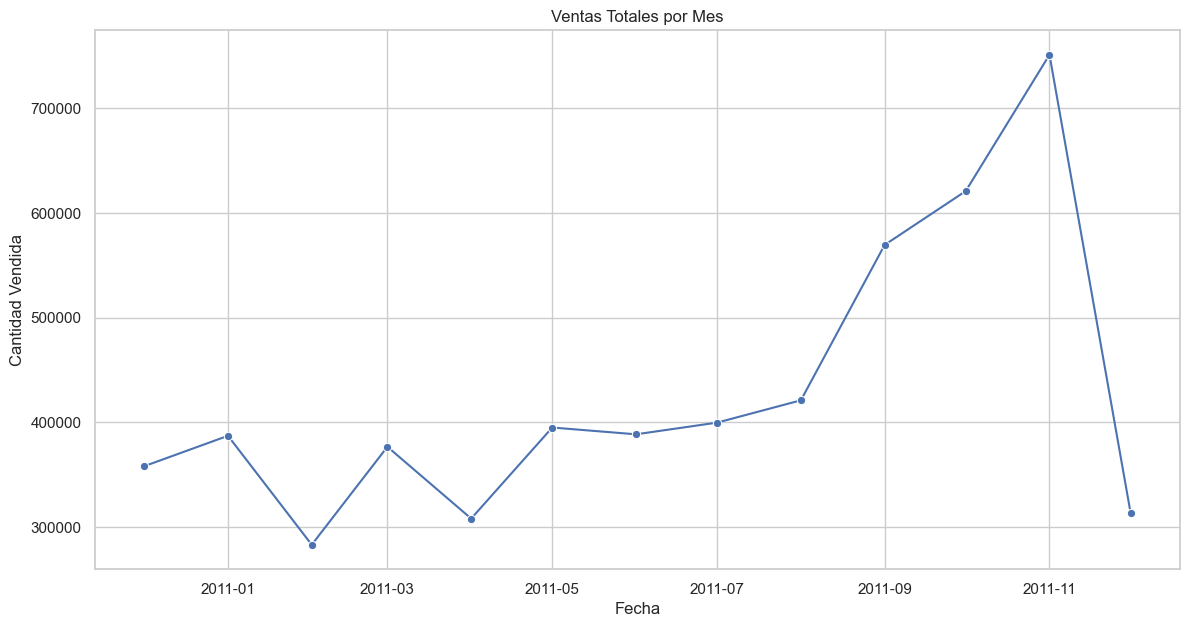

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos para los gráficos
sns.set(style="whitegrid")

# 1. Gráfico de líneas para las ventas a lo largo del tiempo (por mes y año)
plt.figure(figsize=(14, 7))
sales_over_time = data.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
sales_over_time['Date'] = pd.to_datetime(sales_over_time['Year'].astype(str) + '-' + sales_over_time['Month'].astype(str))
sns.lineplot(data=sales_over_time, x='Date', y='Quantity', marker='o')
plt.title('Ventas Totales por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

### 2. **Gráfico de Dispersión entre Precio Unitario y Cantidad**
- **Observaciones**: La mayoría de las ventas muestran una relación inversa entre cantidad y precio unitario, con algunos valores extremos en ambos parámetros.
- **Insights**:
  - **Gestión de Precios**: Implementar estrategias de precios que optimicen tanto la cantidad vendida como los ingresos totales.
  - **Revisión de Grandes Transacciones**: Revisar transacciones con altos volúmenes y precios para asegurar que son legítimas y no errores o fraudes.


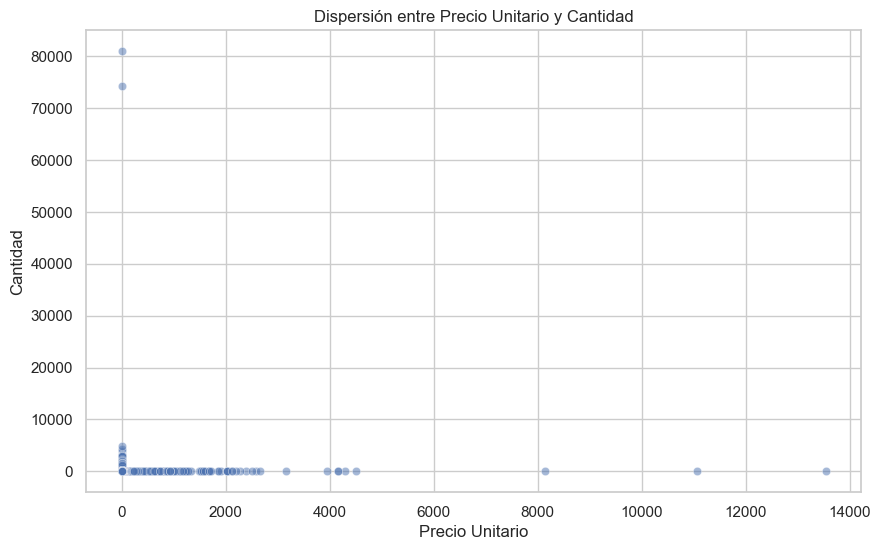

In [137]:
# 2. Gráfico de dispersión para explorar correlaciones entre Precio Unitario y Cantidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='UnitPrice', y='Quantity', alpha=0.5)
plt.title('Dispersión entre Precio Unitario y Cantidad')
plt.xlabel('Precio Unitario')
plt.ylabel('Cantidad')
plt.show()


### 3. **Mapa de Calor de la Actividad de Ventas por Región y Mes**
- **Observaciones**: El Reino Unido tiene el volumen de ventas más alto, con notables picos en ciertos meses.
- **Insights**:
  - **Enfoque Regional**: Adaptar las estrategias de marketing y gestión de inventarios a la demanda específica de cada región.
  - **Análisis de Temporadas Altas**: Preparar para las demandas estacionales específicas de cada región, especialmente durante los meses pico.


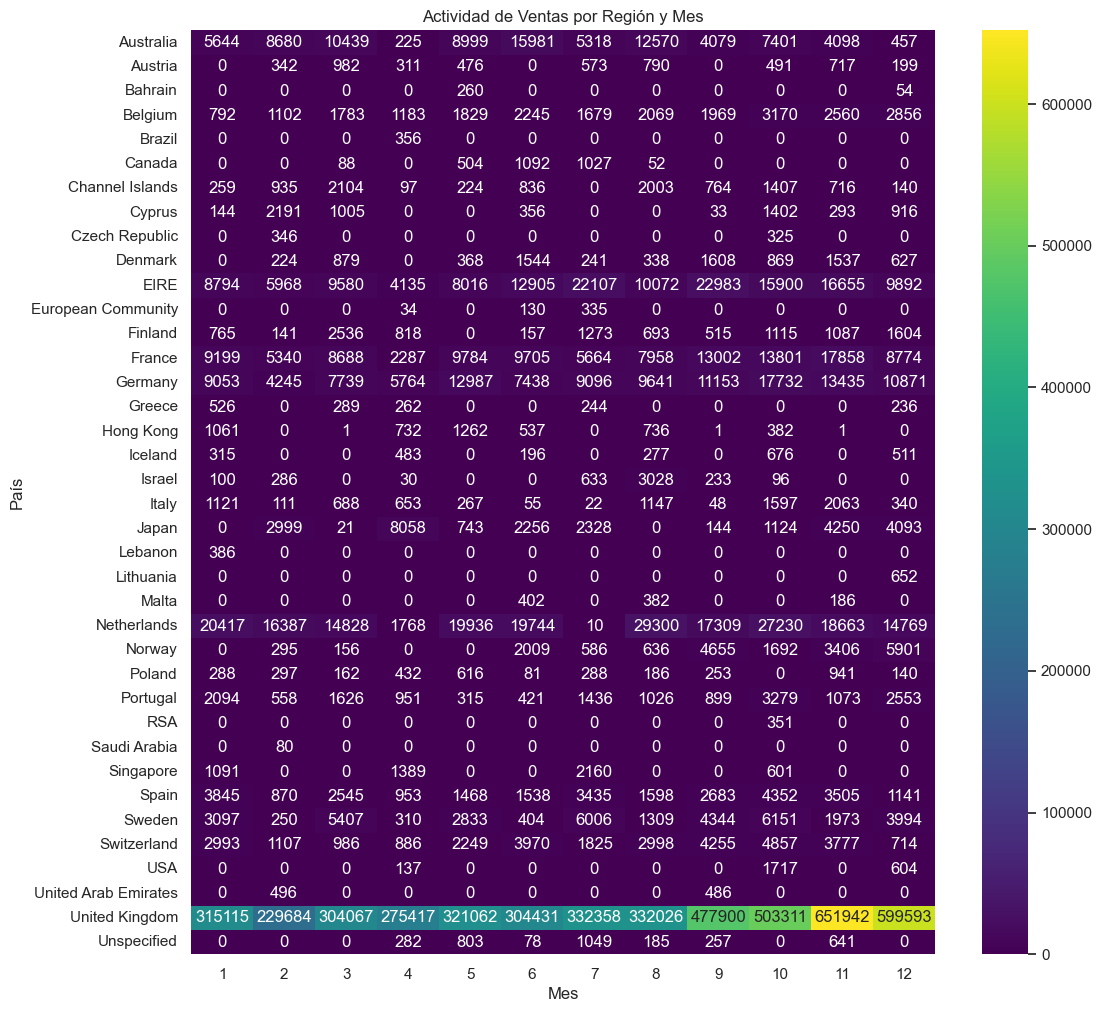

In [138]:
# 3. Mapa de calor para visualizar la actividad de ventas por regiones
# Crear una tabla cruzada de país y mes
heatmap_data = pd.pivot_table(data, values='Quantity', index='Country', columns='Month', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d")
plt.title('Actividad de Ventas por Región y Mes')
plt.xlabel('Mes')
plt.ylabel('País')
plt.show()

### Observaciones:
- Las ventas alcanzan su máximo en mitad de semana (miércoles y jueves) y disminuyen significativamente hacia el fin de semana.
- Las ventas en 2010 son notablemente más bajas que en 2011, sugiriendo un crecimiento o cambios significativos en la operación o estrategia del mercado.

### Insights:
- **Optimización de Recursos**: Asegurar recursos adecuados durante los días pico de ventas (miércoles y jueves) y considerar reducciones apropiadas para fines de semana.
- **Estrategias de Marketing**: Implementar promociones para aumentar las ventas en los días con menor rendimiento, especialmente los lunes y fines de semana.

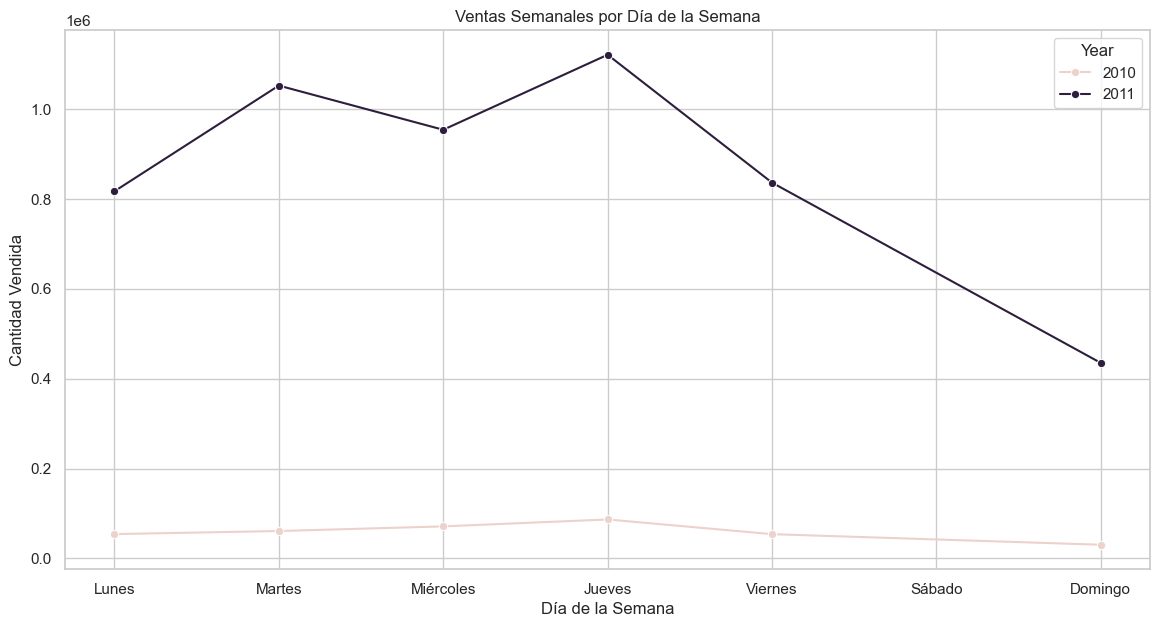

In [140]:
import numpy as np
# 4. Tendencias de ventas semanales a lo largo del año
plt.figure(figsize=(14, 7))
weekly_sales = data.groupby(['Year', 'Weekday'])['Quantity'].sum().reset_index()
sns.lineplot(data=weekly_sales, x='Weekday', y='Quantity', hue='Year', marker='o')
plt.title('Ventas Semanales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Vendida')
plt.xticks(ticks=np.arange(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()